<a href="https://colab.research.google.com/github/BrianBehnke/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Assignment

In writing - work on notebook 113 ("Plotting Playground") from your GitHub fork. Add at least one commit today, and (suggested using your data from yesterday) complete at least:

- 3 plots (start simple i.e. box, scatter, bar, histogram, but can do one "fancy"/non-traditional if you'd like)
- Answers (in text blocks) to the questions "What insight do your plots give you in the data?" and "What was most challenging about making plots?"

In [0]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

# Setting the display options for pandas display to enable larger amount of 
# info to be shown on screen
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Set URL variable
# Source: https://archive.ics.uci.edu/ml/datasets/Mushroom
mushroom_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# Import data into a dataframe
# Using a header option in the read.csv I will also fix the names of the columns

column_names = ["cap-shape", "cap-surface", "cap-color", "bruises",
                       "odor", "gill-attachment", "gill-spacing", "gill-size",
                       "gill-color", "stalk-shape", "stalk-root",
                       "stalk-surface-above-ring", "stalk-surface-below-ring",
                       "stalk-color-above-ring", "stalk-color-below-ring",
                       "veil-type", "veil-color", "ring-number", "ring-type",
                       "spore-print-color", "population", "habitat"]

mushroom_data = pd.read_csv(mushroom_url, header=None, names=column_names)


In [6]:
# Replace all of the '?' to NaN
mushroom_data_replace = mushroom_data.replace('?', np.nan)

# We should take a look at filling based on the most likely value, the mode
mushroom_data_mode_filled = mushroom_data_replace.copy()

for column in mushroom_data_replace:
  column_mode = mushroom_data_replace[column].mode()[0]
  mushroom_data_mode_filled[column].fillna(column_mode, inplace=True)

mushroom_data_mode_filled.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
mushroom_data_mode_filled.head()

cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color ring-number ring-type spore-print-color population habitat
p         x           s         n       t    p               f            c         n          k           e          e                        s                        s                      w                      w         p          w           o         p                 k          s       u
e         x           s         y       t    a               f            c         b          k           e          c                        s                        s                      w                      w         p          w           o         p                 n          n       g
e         b           s         w       t    l               f            c         b          n           e          c                        s                        s                      w                      w         p          w           o         p                 n          n       m
p         x           y         w       t    p               f            c         n          n           e          e                        s                        s                      w                      w         p          w           o         p                 k          s       u
e         x           s         g       f    n               f            w         b          k           t          e                        s                        s                      w                      w         p          w           o         e                 n          a       g

# Needed to find a new dataset, as previous did not contain numerical data
New dataset, with numbers
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/


In [13]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

# Setting the display options for pandas display to enable larger amount of 
# info to be shown on screen
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Set URL variable
# Source: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Import data into a dataframe
# Using a header option in the read.csv I will also fix the names of the columns

column_names_wine = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
                       "Magnesium", "Total phenols", "Flavanoids", 
                       "Nonflavanoid phenols", "Proanthocyanins", 
                       "Color intensity", "Hue",
                       "OD280/OD315 of diluted wines", "Proline"]

wine_data = pd.read_csv(wine_url, header=None, names=column_names_wine)
wine_data.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity         Hue  OD280/OD315 of diluted wines      Proline
count  178.000000  178.000000  178.000000         178.000000  178.000000     178.000000  178.000000            178.000000       178.000000       178.000000  178.000000                    178.000000   178.000000
mean    13.000618    2.336348    2.366517          19.494944   99.741573       2.295112    2.029270              0.361854         1.590899         5.058090    0.957449                      2.611685   746.893258
std      0.811827    1.117146    0.274344           3.339564   14.282484       0.625851    0.998859              0.124453         0.572359         2.318286    0.228572                      0.709990   314.907474
min     11.030000    0.740000    1.360000          10.600000   70.000000       0.980000    0.340000              0.130000         0.410000         1.280000    0.480000                      1.270000   278.000000
25%     12.362500    1.602500    2.210000          17.200000   88.000000       1.742500    1.205000              0.270000         1.250000         3.220000    0.782500                      1.937500   500.500000
50%     13.050000    1.865000    2.360000          19.500000   98.000000       2.355000    2.135000              0.340000         1.555000         4.690000    0.965000                      2.780000   673.500000
75%     13.677500    3.082500    2.557500          21.500000  107.000000       2.800000    2.875000              0.437500         1.950000         6.200000    1.120000                      3.170000   985.000000
max     14.830000    5.800000    3.230000          30.000000  162.000000       3.880000    5.080000              0.660000         3.580000        13.000000    1.710000                      4.000000  1680.000000

In [9]:
wine_data.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  OD280/OD315 of diluted wines  Proline
1    14.23        1.71  2.43               15.6        127           2.80        3.06                  0.28             2.29             5.64  1.04                          3.92     1065
1    13.20        1.78  2.14               11.2        100           2.65        2.76                  0.26             1.28             4.38  1.05                          3.40     1050
1    13.16        2.36  2.67               18.6        101           2.80        3.24                  0.30             2.81             5.68  1.03                          3.17     1185
1    14.37        1.95  2.50               16.8        113           3.85        3.49                  0.24             2.18             7.80  0.86                          3.45     1480
1    13.24        2.59  2.87               21.0        118           2.80        2.69                  0.39             1.82             4.32  1.04                          2.93      735

In [15]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


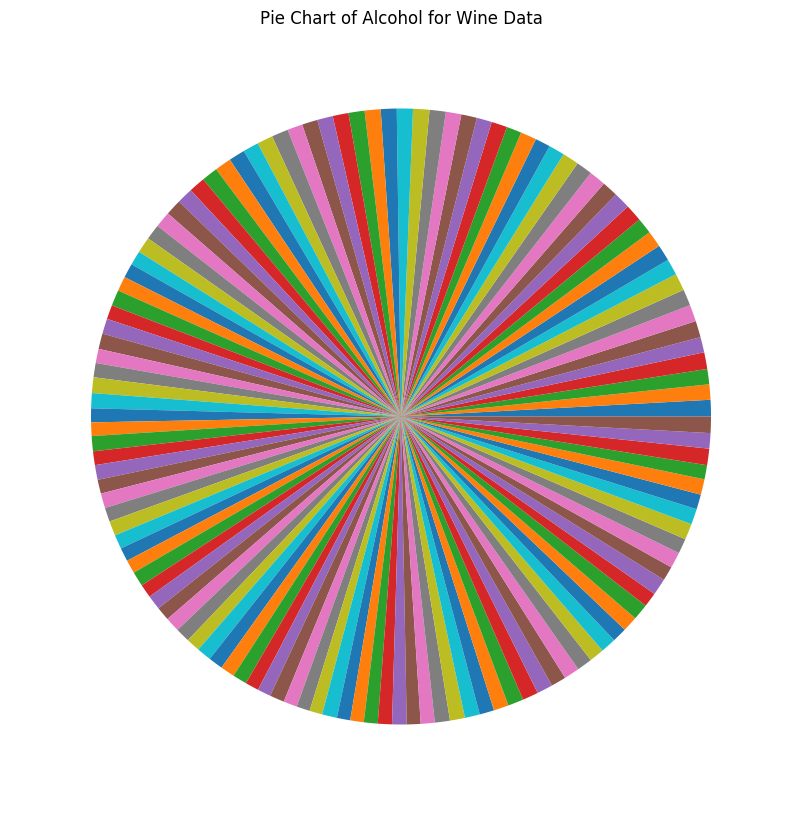

In [61]:
# No missing values and the headers are properly set
# Ready for graphing the data

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 10))
plt.title('Pie Chart of Alcohol for Wine Data')
plt.pie(wine_data['Alcohol'].unique());

plt.show()

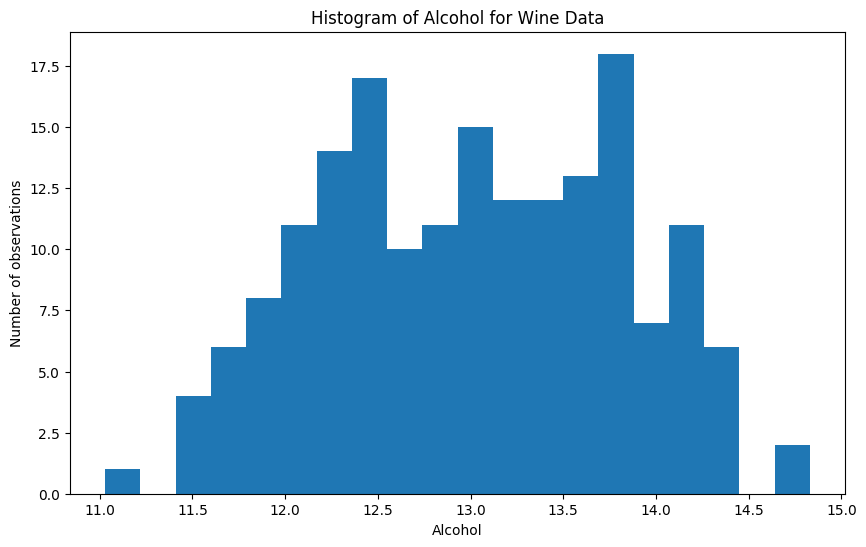

In [58]:
#Histogram

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.hist(wine_data['Alcohol'], bins=20)
plt.title('Histogram of Alcohol for Wine Data')
plt.xlabel('Alcohol')
plt.ylabel('Number of observations')
plt.show()

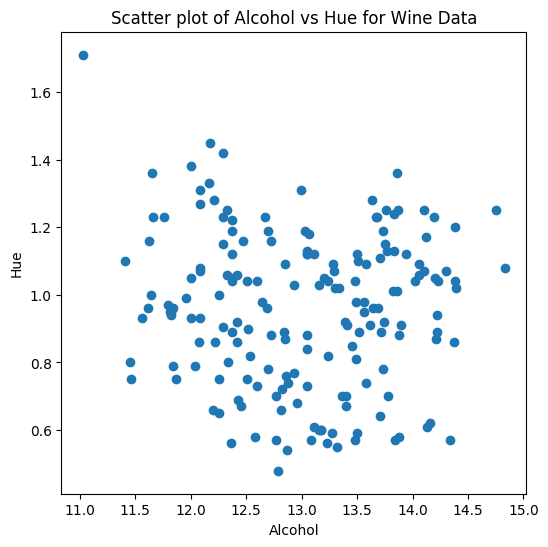

In [65]:
# Pie chart with this many unique observations is not useful
# Lets look at a scatter plot

fig, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Scatter plot of Alcohol vs Hue for Wine Data')
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.scatter(wine_data['Alcohol'], wine_data['Hue'])
plt.show()

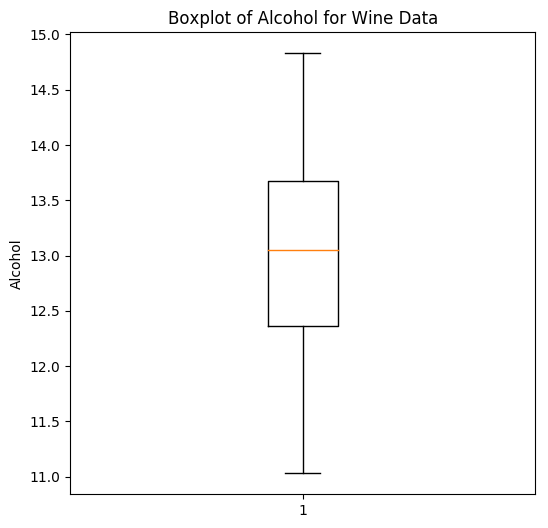

In [68]:
# That looks much nicer than the pie chart
# Lets try a box plot
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Boxplot of Alcohol for Wine Data')
plt.ylabel('Alcohol')

plt.boxplot(wine_data['Alcohol'])
plt.show()


In [0]:
# Grouping the data by Alcohol and hue
grouped_data = wine_data["Alcohol"].groupby(wine_data['Hue'])
list(grouped_data)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


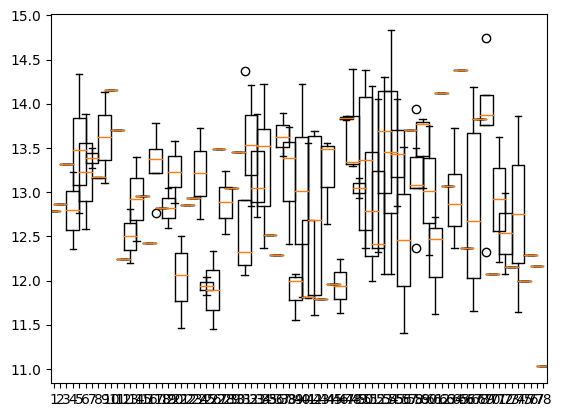

In [32]:
# Creating the boxplox with the grouped data
plt.boxplot([group for name, group in grouped_data], widths=2);
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


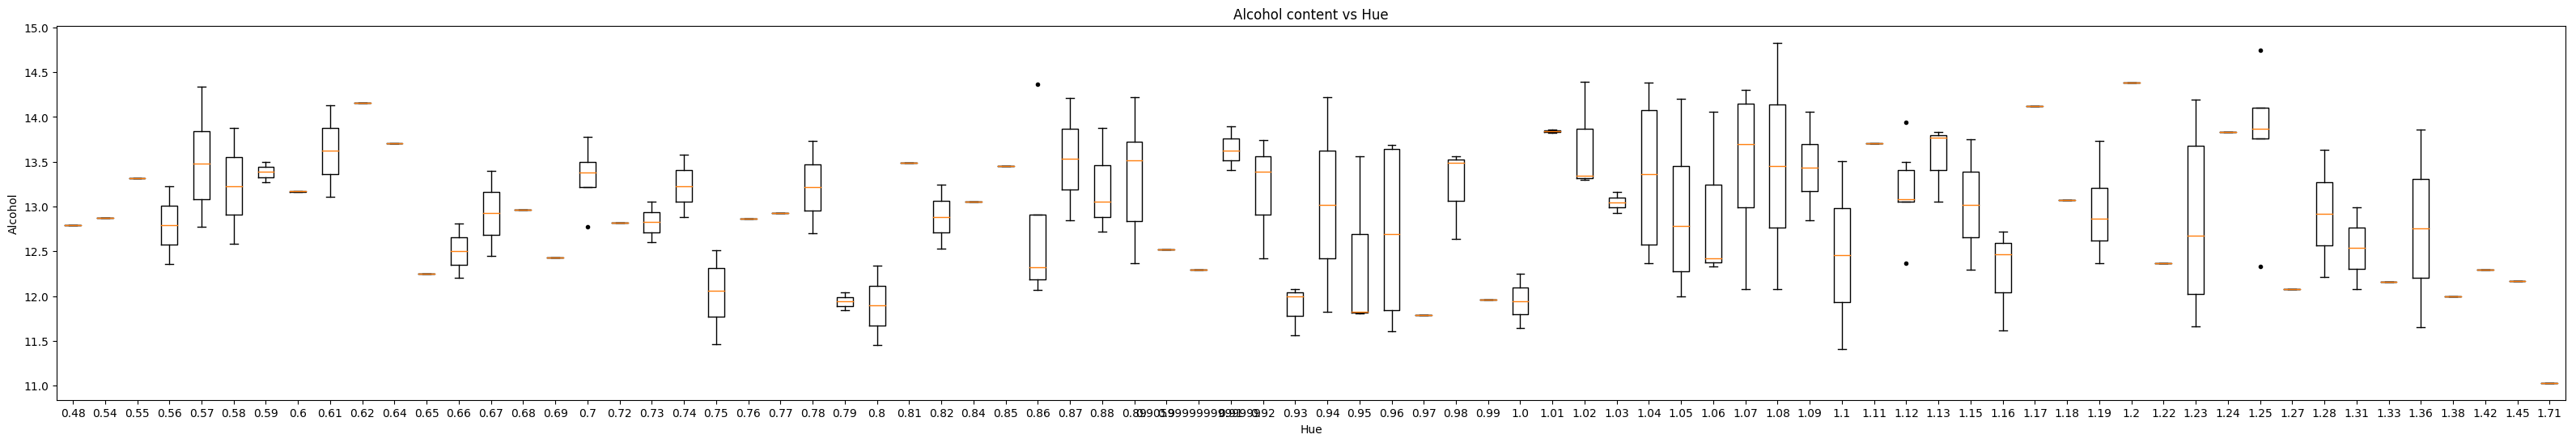

In [73]:
# Maybe we need to beautify this boxplot

boxplot_data = [group for name, group in grouped_data]

fig, ax1 = plt.subplots(figsize=(40, 6))
bp = plt.boxplot(boxplot_data, sym='k.', showfliers=True)

ax1.set_axisbelow(True)
ax1.set_title('Alcohol content vs Hue')
ax1.set_xlabel('Hue')
ax1.set_ylabel('Alcohol')

# Set x axis labels by grabbing and sorting unique group values
# plt.setp(ax1, xticklabels=sorted(water_data[16].unique()))

# Set x axis labels by getting the names from the grouped data
plt.setp(ax1, xticklabels=[name for name, group in grouped_data])

plt.show()

In [0]:
# After making the chart wider to fit the data, may want to pare the number 
# of observations down to fit better
#TODO - figure out how to eliminate some of the data

In [81]:
# Look at the header for the dataframe
wine_data_pared = wine_data
wine_data_pared.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  OD280/OD315 of diluted wines  Proline
1    14.23        1.71  2.43               15.6        127           2.80        3.06                  0.28             2.29             5.64  1.04                          3.92     1065
1    13.20        1.78  2.14               11.2        100           2.65        2.76                  0.26             1.28             4.38  1.05                          3.40     1050
1    13.16        2.36  2.67               18.6        101           2.80        3.24                  0.30             2.81             5.68  1.03                          3.17     1185
1    14.37        1.95  2.50               16.8        113           3.85        3.49                  0.24             2.18             7.80  0.86                          3.45     1480
1    13.24        2.59  2.87               21.0        118           2.80        2.69                  0.39             1.82             4.32  1.04                          2.93      735

In [91]:
# Sort the data by the "Hue" column to see where duplicates are
wine_data_pared.sort_values(by=['Hue']).head(20)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  OD280/OD315 of diluted wines  Proline
3    12.79        2.67  2.48               22.0        112           1.48        1.36                  0.24             1.26        10.800000  0.48                          1.47      480
3    12.87        4.61  2.48               21.5         86           1.70        0.65                  0.47             0.86         7.650000  0.54                          1.86      625
3    13.32        3.24  2.38               21.5         92           1.93        0.76                  0.45             1.25         8.420000  0.55                          1.62      650
3    13.23        3.30  2.28               18.5         98           1.80        0.83                  0.61             1.87        10.520000  0.56                          1.51      675
3    12.36        3.83  2.38               21.0         88           2.30        0.92                  0.50             1.04         7.650000  0.56                          1.58      520
3    13.08        3.90  2.36               21.5        113           1.41        1.39                  0.34             1.14         9.400000  0.57                          1.33      550
3    12.77        2.39  2.28               19.5         86           1.39        0.51                  0.48             0.64         9.899999  0.57                          1.63      470
3    13.48        1.67  2.64               22.5         89           2.60        1.10                  0.52             2.29        11.750000  0.57                          1.78      620
3    13.84        4.12  2.38               19.5         89           1.80        0.83                  0.48             1.56         9.010000  0.57                          1.64      480
3    14.34        1.68  2.70               25.0         98           2.80        1.31                  0.53             2.70        13.000000  0.57                          1.96      660
3    12.58        1.29  2.10               20.0        103           1.48        0.58                  0.53             1.40         7.600000  0.58                          1.55      640
3    13.88        5.04  2.23               20.0         80           0.98        0.34                  0.40             0.68         4.900000  0.58                          1.33      415
3    13.50        3.12  2.62               24.0        123           1.40        1.57                  0.22             1.25         8.600000  0.59                          1.30      500
3    13.27        4.28  2.26               20.0        120           1.59        0.69                  0.43             1.35        10.200000  0.59                          1.56      835
3    13.17        5.19  2.32               22.0         93           1.74        0.63                  0.61             1.55         7.900000  0.60                          1.48      725
3    13.17        2.59  2.37               20.0        120           1.65        0.68                  0.53             1.46         9.300000  0.60                          1.62      840
3    13.16        3.57  2.15               21.0        102           1.50        0.55                  0.43             1.30         4.000000  0.60                          1.68      830
3    13.11        1.90  2.75               25.5        116           2.20        1.28                  0.26             1.56         7.100000  0.61                          1.33      425
3    14.13        4.10  2.74               24.5         96           2.05        0.76                  0.56             1.35         9.200000  0.61                          1.60      560
3    14.16        2.51  2.48               20.0         91           1.68        0.70                  0.44             1.24         9.700000  0.62                          1.71      660

In [90]:
# Verify duplicates using bool 
wine_data_pared['Hue'].sort_values().duplicated()

3    False
3    False
3    False
3    False
3     True
3    False
3     True
3     True
3     True
3     True
3    False
3     True
3    False
3     True
3    False
3     True
3     True
3    False
3     True
3    False
3    False
3    False
3    False
3     True
3    False
3     True
3    False
2    False
3    False
3     True
2     True
3     True
3    False
3    False
2     True
3    False
3     True
2    False
3     True
3     True
2     True
3    False
3    False
3    False
3     True
2    False
2     True
2    False
2     True
3    False
1    False
3     True
2    False
3    False
2    False
2     True
2     True
1     True
3    False
1     True
1    False
2     True
1     True
3    False
1     True
2     True
3     True
1     True
2    False
2    False
1    False
3     True
1     True
2    False
1     True
1     True
2    False
2     True
2     True
2    False
1     True
1    False
2     True
2     True
1    False
3     True
2     True
2     True
2     True
2    False
1    False

In [109]:
# Create a new column named "Duplicate" to identify the duplicate entries and 
# sort by "Hue" to see changes
wine_data_pared['Duplicate'] = np.where(wine_data_pared['Hue'].duplicated() == True, 'yes', 'no')
wine_data_pared.sort_values(by=['Hue']).head(20)


Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  OD280/OD315 of diluted wines  Proline Duplicate
3    12.79        2.67  2.48               22.0        112           1.48        1.36                  0.24             1.26        10.800000  0.48                          1.47      480        no
3    12.87        4.61  2.48               21.5         86           1.70        0.65                  0.47             0.86         7.650000  0.54                          1.86      625        no
3    13.32        3.24  2.38               21.5         92           1.93        0.76                  0.45             1.25         8.420000  0.55                          1.62      650        no
3    13.23        3.30  2.28               18.5         98           1.80        0.83                  0.61             1.87        10.520000  0.56                          1.51      675        no
3    12.36        3.83  2.38               21.0         88           2.30        0.92                  0.50             1.04         7.650000  0.56                          1.58      520       yes
3    13.08        3.90  2.36               21.5        113           1.41        1.39                  0.34             1.14         9.400000  0.57                          1.33      550        no
3    12.77        2.39  2.28               19.5         86           1.39        0.51                  0.48             0.64         9.899999  0.57                          1.63      470       yes
3    13.48        1.67  2.64               22.5         89           2.60        1.10                  0.52             2.29        11.750000  0.57                          1.78      620       yes
3    13.84        4.12  2.38               19.5         89           1.80        0.83                  0.48             1.56         9.010000  0.57                          1.64      480       yes
3    14.34        1.68  2.70               25.0         98           2.80        1.31                  0.53             2.70        13.000000  0.57                          1.96      660       yes
3    12.58        1.29  2.10               20.0        103           1.48        0.58                  0.53             1.40         7.600000  0.58                          1.55      640       yes
3    13.88        5.04  2.23               20.0         80           0.98        0.34                  0.40             0.68         4.900000  0.58                          1.33      415        no
3    13.50        3.12  2.62               24.0        123           1.40        1.57                  0.22             1.25         8.600000  0.59                          1.30      500        no
3    13.27        4.28  2.26               20.0        120           1.59        0.69                  0.43             1.35        10.200000  0.59                          1.56      835       yes
3    13.17        5.19  2.32               22.0         93           1.74        0.63                  0.61             1.55         7.900000  0.60                          1.48      725       yes
3    13.17        2.59  2.37               20.0        120           1.65        0.68                  0.53             1.46         9.300000  0.60                          1.62      840       yes
3    13.16        3.57  2.15               21.0        102           1.50        0.55                  0.43             1.30         4.000000  0.60                          1.68      830        no
3    13.11        1.90  2.75               25.5        116           2.20        1.28                  0.26             1.56         7.100000  0.61                          1.33      425        no
3    14.13        4.10  2.74               24.5         96           2.05        0.76                  0.56             1.35         9.200000  0.61                          1.60      560       yes
3    14.16        2.51  2.48               20.0         91     

In [112]:
# Replace "no" in "Duplicate" column with Nan and check sum of NaNs
wine_data_replaced = wine_data_pared.replace('no', np.nan)
print(wine_data_replaced.isna().sum())
wine_data_replaced.isna().sum().sum()

Alcohol                          0
Malic acid                       0
Ash                              0
Alcalinity of ash                0
Magnesium                        0
Total phenols                    0
Flavanoids                       0
Nonflavanoid phenols             0
Proanthocyanins                  0
Color intensity                  0
Hue                              0
OD280/OD315 of diluted wines     0
Proline                          0
Duplicate                       78
dtype: int64


78

In [114]:
# Verify shape of dataframe prior to dropping NaNs
wine_data_replaced.shape

(178, 14)

In [115]:
# Drop NaNs and recheck shape to verify correct number of NaNs dropped
wine_data_dropped = wine_data_replaced.dropna() 
wine_data_dropped.shape

(100, 14)

In [120]:
# Sort dataframe after dropping NaNs
wine_data_dropped['Hue'].sort_values().duplicated()

3    False
3    False
3     True
3     True
3     True
3    False
3    False
3    False
3     True
3    False
3    False
3    False
3    False
3     True
3     True
3    False
3    False
2    False
3     True
3     True
3    False
2    False
2    False
3    False
2    False
2     True
2     True
3    False
2    False
1     True
2    False
3     True
1     True
3     True
1    False
3     True
1    False
2     True
2    False
2     True
2    False
2    False
2     True
2    False
2     True
3     True
2     True
2    False
2     True
2    False
1    False
2    False
1     True
1    False
2    False
1     True
2     True
2     True
1     True
1     True
1     True
2    False
2     True
1     True
2    False
2     True
2    False
1     True
1     True
2    False
1    False
1     True
1     True
2    False
1    False
1     True
1     True
2     True
2     True
1    False
1     True
2    False
2    False
2     True
2    False
2     True
2     True
2    False
2     True
1     True
2     True

In [117]:
# Looks like we didnt remove true duplicates as this sorted header shows
# *sadface*
wine_data_dropped.sort_values(by=['Hue']).head(20)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  OD280/OD315 of diluted wines  Proline Duplicate
3    12.36        3.83  2.38               21.0         88           2.30        0.92                  0.50             1.04         7.650000  0.56                          1.58      520       yes
3    13.84        4.12  2.38               19.5         89           1.80        0.83                  0.48             1.56         9.010000  0.57                          1.64      480       yes
3    14.34        1.68  2.70               25.0         98           2.80        1.31                  0.53             2.70        13.000000  0.57                          1.96      660       yes
3    12.77        2.39  2.28               19.5         86           1.39        0.51                  0.48             0.64         9.899999  0.57                          1.63      470       yes
3    13.48        1.67  2.64               22.5         89           2.60        1.10                  0.52             2.29        11.750000  0.57                          1.78      620       yes
3    12.58        1.29  2.10               20.0        103           1.48        0.58                  0.53             1.40         7.600000  0.58                          1.55      640       yes
3    13.27        4.28  2.26               20.0        120           1.59        0.69                  0.43             1.35        10.200000  0.59                          1.56      835       yes
3    13.17        2.59  2.37               20.0        120           1.65        0.68                  0.53             1.46         9.300000  0.60                          1.62      840       yes
3    13.17        5.19  2.32               22.0         93           1.74        0.63                  0.61             1.55         7.900000  0.60                          1.48      725       yes
3    14.13        4.10  2.74               24.5         96           2.05        0.76                  0.56             1.35         9.200000  0.61                          1.60      560       yes
3    12.20        3.03  2.32               19.0         96           1.25        0.49                  0.40             0.73         5.500000  0.66                          1.83      510       yes
3    13.40        4.60  2.86               25.0        112           1.98        0.96                  0.27             1.11         8.500000  0.67                          1.92      630       yes
3    13.78        2.76  2.30               22.0         90           1.35        0.68                  0.41             1.03         9.580000  0.70                          1.68      615       yes
3    13.36        2.56  2.35               20.0         89           1.40        0.50                  0.37             0.64         5.600000  0.70                          2.47      780       yes
3    13.40        3.91  2.48               23.0        102           1.80        0.75                  0.43             1.41         7.300000  0.70                          1.56      750       yes
3    12.60        2.46  2.20               18.5         94           1.62        0.66                  0.63             0.94         7.100000  0.73                          1.58      695       yes
3    13.58        2.58  2.69               24.5        105           1.55        0.84                  0.39             1.54         8.660000  0.74                          1.80      750       yes
2    11.87        4.31  2.39               21.0         82           2.86        3.03                  0.21             2.91         2.800000  0.75                          3.64      380       yes
3    12.51        1.24  2.25               17.5         85           2.00        0.58                  0.60             1.25         5.450000  0.75                          1.51      650       yes
3    12.25        4.72  2.54               21.0         89     

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


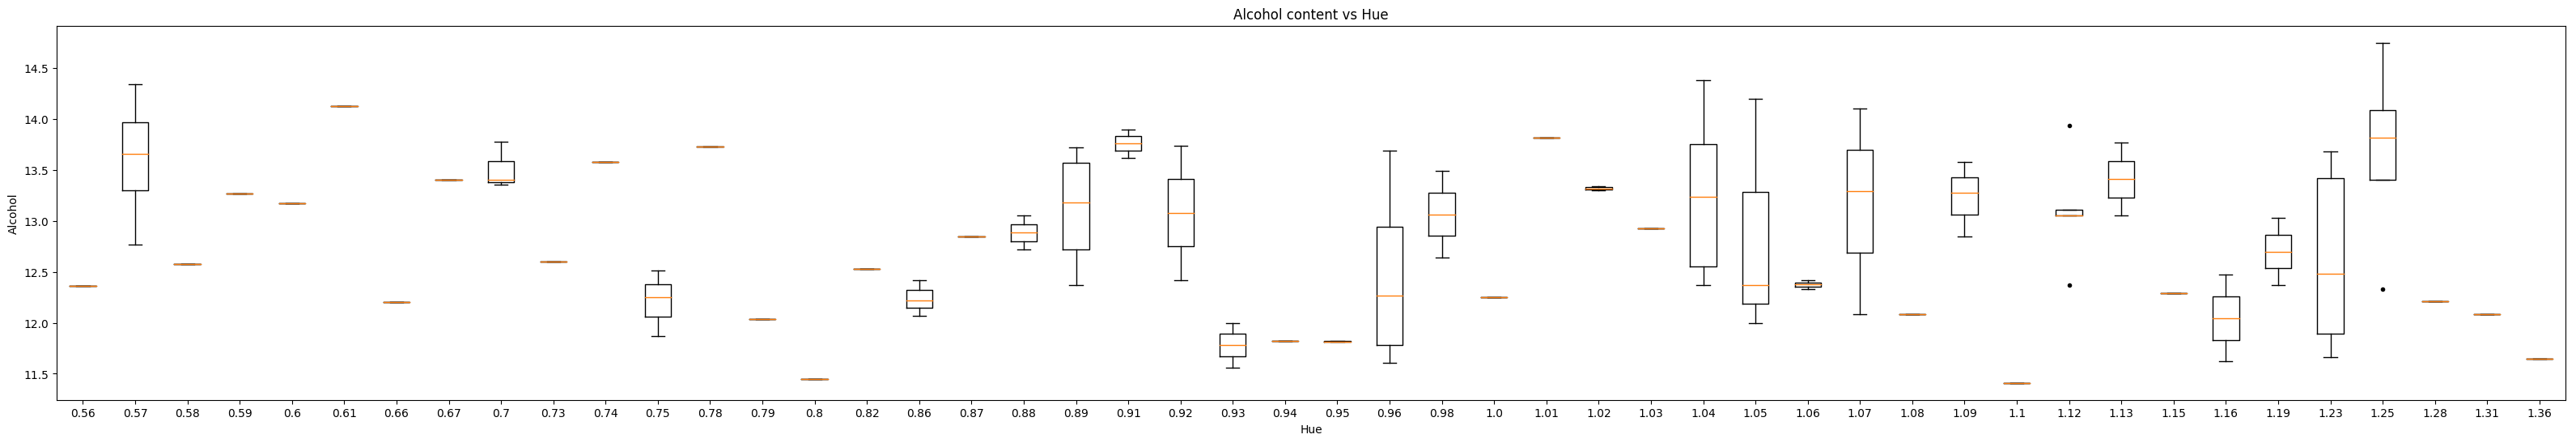

In [119]:
# Tried boxplat chart again to see if we have any changes
grouped_data = wine_data_dropped["Alcohol"].groupby(wine_data_dropped['Hue'])
list(grouped_data)

boxplot_data = [group for name, group in grouped_data]

fig, ax1 = plt.subplots(figsize=(40, 6))
bp = plt.boxplot(boxplot_data, sym='k.', showfliers=True)

ax1.set_axisbelow(True)
ax1.set_title('Alcohol content vs Hue')
ax1.set_xlabel('Hue')
ax1.set_ylabel('Alcohol')

# Set x axis labels by grabbing and sorting unique group values
# plt.setp(ax1, xticklabels=sorted(water_data[16].unique()))

# Set x axis labels by getting the names from the grouped data
plt.setp(ax1, xticklabels=[name for name, group in grouped_data])

plt.show()

Unfortunately I could not figure out how to remove the observations that were NOT duplicates, which would have made the boxplot easier to read. Will check into additional resources. 

# Answers to the questions!
"What insight do your plots give you in the data?" 
My first chart, a pie chart, gave no insights as there are too many variables to display anything of value. 

My second chart was a Histogram, which showed the frequesncy of the amounts of alcohol recorded in each wine. While it did give some insight into the data the spread of the data was not large and the entire set was close to the same number. 

The third chart I did was a Scatterplot which showed a good spread of data which I could not readily discern a pattern or see an obvious trendline between Hue and Alcohol content. 

The forth chart I did was a Boxplot. Unfortunately there were too many variables to make an easily read chart. I did try to get the data in a place to show something more but I was unsuccessful, so my chart didnt really give any insights.


"What was most challenging about making plots?"
The major challenge with creating the charts is determining if the data is sufficient and if not how to go about manipulating the data to get it in a position to make good charts. I am still learning how to make these changes in python so that was another struggle, but it is a fun lesson in data cleaning. 
